In [84]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [85]:
# Load datasets
airports_url = "https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat"
routes_url = "https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat"

# Define column names for datasets
airports_columns = ['Airport ID', 'Name', 'City', 'Country', 'IATA', 'ICAO', 'Latitude', 'Longitude', 'Altitude', 'Timezone', 'DST', 'Tz Database Timezone', 'Type', 'Source']
routes_columns = ['Airline', 'Airline ID', 'Source Airport', 'Source Airport ID', 'Destination Airport', 'Destination Airport ID', 'Codeshare', 'Stops', 'Equipment']

# Load data into DataFrames
airports_df = pd.read_csv(airports_url, header=None, names=airports_columns)
routes_df = pd.read_csv(routes_url, header=None, names=routes_columns)

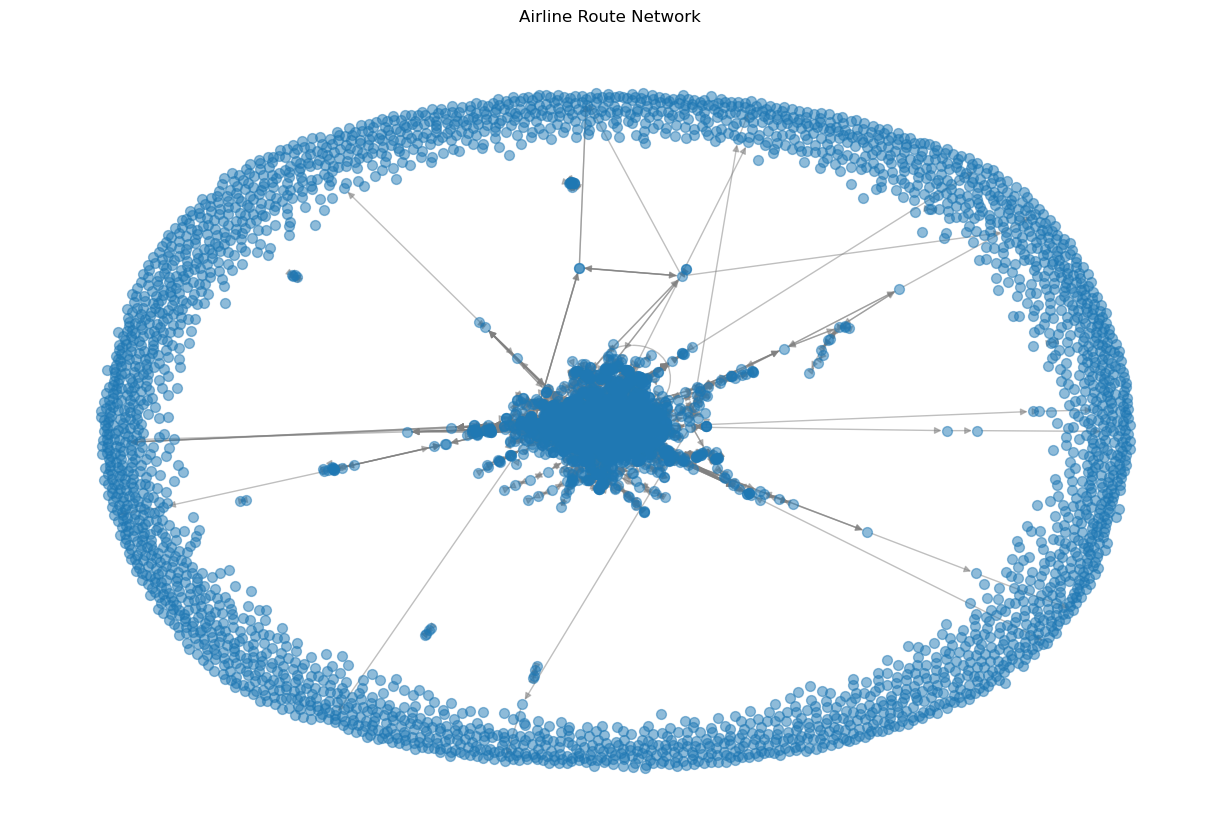

In [86]:
G = nx.DiGraph()

# Add nodes
for _, row in airports_df.iterrows():
    G.add_node(row['IATA'], name=row['Name'], city=row['City'], country=row['Country'], latitude=row['Latitude'], longitude=row['Longitude'])

# Add edges
for _, row in routes_df.iterrows():
    G.add_edge(row['Source Airport'], row['Destination Airport'])

# Basic visualization
plt.figure(figsize=(12, 8))
nx.draw(G, with_labels=False, node_size=50, edge_color='grey', alpha=0.5)
plt.title("Airline Route Network")
plt.show()

Top 5 Airports by Degree Centrality: [('FRA', 0.07650360866078589), ('CDG', 0.07538091419406576), ('AMS', 0.07425821972734563), ('IST', 0.07329591018444266), ('ATL', 0.06944667201283079)]
Top 5 Airports by Betweenness Centrality: [('ANC', 0.02116883434702232), ('LAX', 0.01995067366153472), ('CDG', 0.018605698238074363), ('DXB', 0.017896227434059022), ('FRA', 0.015378236330720151)]
Top 5 Airports by Closeness Centrality: [('FRA', 0.2154836549228251), ('CDG', 0.21416772420573915), ('LHR', 0.2132411332567667), ('DXB', 0.21092275868747035), ('AMS', 0.21029037956778926)]


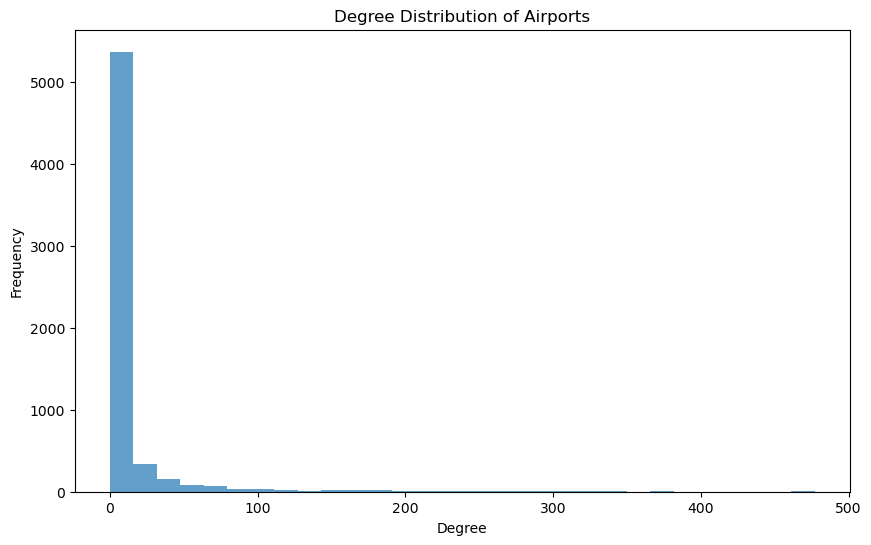

In [87]:
# Centrality Measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Add centrality measures as node attributes
nx.set_node_attributes(G, degree_centrality, 'degree_centrality')
nx.set_node_attributes(G, betweenness_centrality, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_centrality, 'closeness_centrality')

# Top 5 airports by degree centrality
top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 Airports by Degree Centrality:", top_degree)

# Top 5 airports by betweenness centrality
top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 Airports by Betweenness Centrality:", top_betweenness)

# Top 5 airports by closeness centrality
top_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 Airports by Closeness Centrality:", top_closeness)

# Degree Distribution
degree_sequence = [d for n, d in G.degree()]
plt.figure(figsize=(10, 6))
plt.hist(degree_sequence, bins=30, alpha=0.7)
plt.title("Degree Distribution of Airports")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

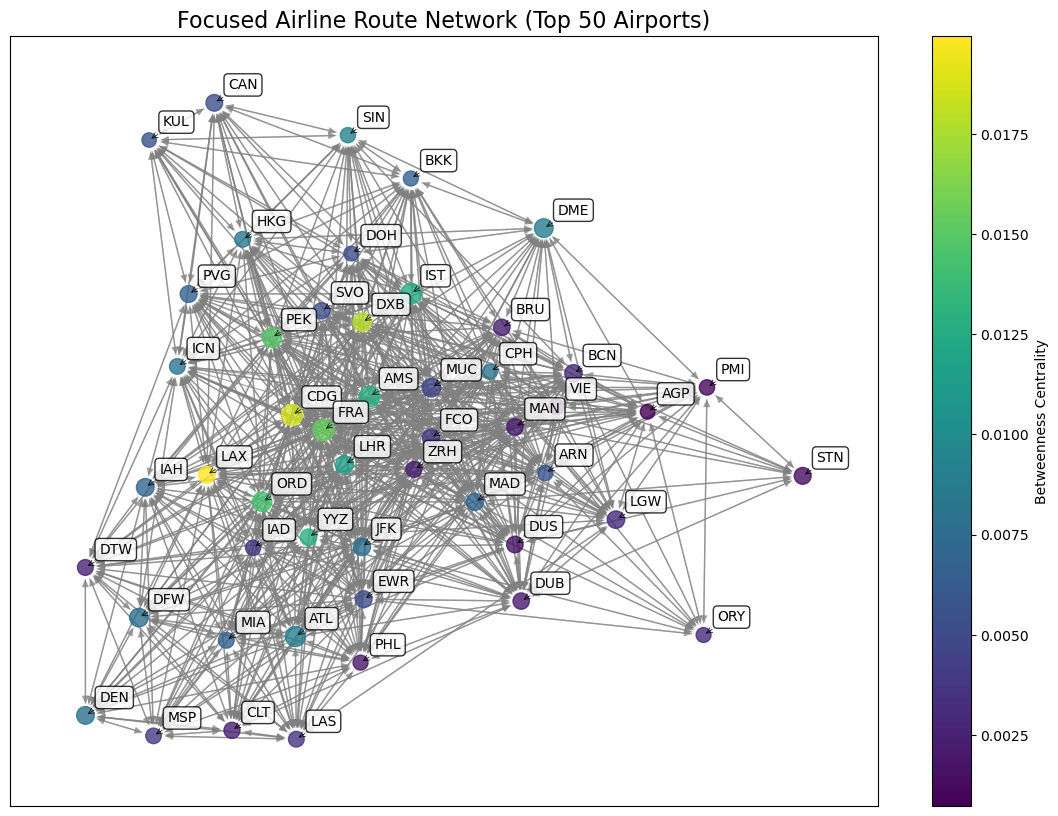

In [88]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

# Focus on top airports by degree centrality
top_airports = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:50]
top_airport_nodes = [node for node, _ in top_airports]
focused_subgraph = G.subgraph(top_airport_nodes)

# Adjust node size and color for the focused graph
node_sizes = [degree_centrality[n] * 3000 for n in focused_subgraph.nodes()]
node_colors = [betweenness_centrality[n] for n in focused_subgraph.nodes()]

# Create colormap for nodes
cmap = plt.cm.viridis
norm = Normalize(vmin=min(node_colors), vmax=max(node_colors))

fig, ax = plt.subplots(figsize=(14, 10))
pos = nx.spring_layout(focused_subgraph, seed=42)

# Draw nodes and edges
nx.draw_networkx_nodes(
    focused_subgraph, pos, node_size=node_sizes, node_color=node_colors, cmap=cmap, alpha=0.8, ax=ax
)
nx.draw_networkx_edges(focused_subgraph, pos, edge_color='grey', alpha=0.6, ax=ax)

# Add labels with annotations for key nodes
for node, (x, y) in pos.items():
    ax.annotate(
        node,
        xy=(x, y),
        xytext=(10, 10),
        textcoords='offset points',
        arrowprops=dict(arrowstyle='->', color='black', lw=0.5),
        fontsize=10,
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='black', boxstyle='round,pad=0.3'),
    )

# Add colorbar
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=ax, label="Betweenness Centrality")

plt.title("Focused Airline Route Network (Top 50 Airports)", fontsize=16)
plt.show()

In [89]:
import plotly.graph_objects as go
import networkx as nx

# Focus on top 50 airports
top_50_airports = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:50]
top_50_nodes = [node for node, _ in top_50_airports]
top_50_subgraph = G.subgraph(top_50_nodes)

# Get positions
pos = nx.spring_layout(top_50_subgraph, seed=42)

# Prepare edge trace
edge_x = []
edge_y = []

for edge in top_50_subgraph.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

edge_trace = go.Scatter(
    x=edge_x,
    y=edge_y,
    line=dict(width=0.5, color='gray'),
    hoverinfo='none',
    mode='lines'
)

# Prepare node trace with larger node size
node_x = []
node_y = []
node_size = []
node_color = []
node_text = []

for node in top_50_subgraph.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_size.append(degree_centrality[node] * 100)  # Increase size for better visibility
    node_color.append(betweenness_centrality[node])
    node_text.append(f"Airport: {node}<br>Degree Centrality: {degree_centrality[node]:.3f}<br>Betweenness Centrality: {betweenness_centrality[node]:.3f}")

node_trace = go.Scatter(
    x=node_x,
    y=node_y,
    mode='markers+text',
    text=[node for node in top_50_subgraph.nodes()],  # Display only airport codes as labels
    hoverinfo='text',
    hovertext=node_text,  # Tooltip shows centrality details
    marker=dict(
        size=node_size,
        color=node_color,  # Apply betweenness centrality color
        colorscale='Viridis',
        colorbar=dict(title="Betweenness Centrality"),
        showscale=True,
        line=dict(width=2, color='black')  
    ),
    textposition="top center"  # Text labels directly above nodes
)

# Combine traces
fig = go.Figure(data=[edge_trace, node_trace])

# Customize layout
fig.update_layout(
    title="Top 50 Airports - Interactive Network",
    showlegend=False,
    hovermode='closest',
    margin=dict(b=0, l=0, r=0, t=50),
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(showgrid=False, zeroline=False)
)

fig.show()


In [91]:
# Remove duplicates, keeping the first occurrence
airports_df = airports_df.drop_duplicates(subset='IATA', keep='first')

# Now, create the coordinates dictionary
coordinates = airports_df.set_index('IATA')[['Latitude', 'Longitude']].to_dict('index')

In [92]:
import plotly.graph_objects as go
import pandas as pd

# Ensure duplicate IATA codes are handled
airports_df = airports_df.drop_duplicates(subset='IATA', keep='first')

# Create coordinates dictionary
coordinates = airports_df.set_index('IATA')[['Latitude', 'Longitude']].to_dict('index')

# Prepare edge traces for globe
edge_traces = []
for edge in top_25_subgraph.edges():
    from_airport, to_airport = edge
    if from_airport in coordinates and to_airport in coordinates:
        edge_traces.append(
            go.Scattergeo(
                lon=[coordinates[from_airport]['Longitude'], coordinates[to_airport]['Longitude']],
                lat=[coordinates[from_airport]['Latitude'], coordinates[to_airport]['Latitude']],
                mode='lines',
                line=dict(width=1.5, color='blue'),  # Adjust line width/color
                opacity=0.5
            )
        )

# Prepare node trace with dots and simplified text
node_trace = go.Scattergeo(
    lon=[coordinates[airport]['Longitude'] for airport in top_25_subgraph.nodes()],
    lat=[coordinates[airport]['Latitude'] for airport in top_25_subgraph.nodes()],
    text=[airport for airport in top_25_subgraph.nodes()],  # Only show the airport code on the node
    mode='markers+text',  # Markers + Text
    marker=dict(
        size=[degree_centrality[node] * 200 for node in top_25_subgraph.nodes()],  # Adjust size for dots
        color=[betweenness_centrality[node] for node in top_25_subgraph.nodes()],  # Color by betweenness centrality
        colorscale='Viridis',
        showscale=True,
        colorbar=dict(title="Betweenness Centrality"),
    ),
    hovertext=[
        f"Airport: {airport}<br>Degree Centrality: {degree_centrality[airport]:.3f}<br>Betweenness Centrality: {betweenness_centrality[airport]:.3f}"
        for airport in top_25_subgraph.nodes()
    ],
    hoverinfo='text',  # Tooltip info (airport + centralities)
    textfont=dict(size=12, color="white"),  # Font style for airport codes on globe
    textposition="top center"  # Place the airport codes above the dots
)

# Combine traces for interactive globe
fig = go.Figure(data=edge_traces + [node_trace])

# Update layout for globe projection
fig.update_layout(
    title='Geographical Airline Route Network on Globe (Top 25 Airports)',
    showlegend=False,
    geo=dict(
        scope='world',
        projection_type='orthographic',  # Globe projection
        showland=True,
        landcolor="rgb(217, 217, 217)",
        oceancolor="rgb(128, 179, 255)",
        showocean=True,
        countrycolor="rgb(255, 255, 255)"
    )
)

fig.show()
